# Step 1. 인물모드 직접 해 보기

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

urllib.request.urlretrieve(model_url, model_file)

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [2]:
colormap = np.zeros((256, 3), dtype=int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3
    
colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

---

# 사람 이미지

(832, 534, 3)


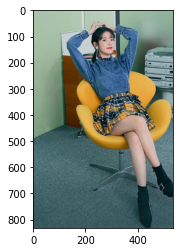

In [3]:
person_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/iu_image.jpeg'  
person_img_orig = cv2.imread(person_img_path)

print(person_img_orig.shape)

plt.imshow(cv2.cvtColor(person_img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### 1. 세그멘테이션

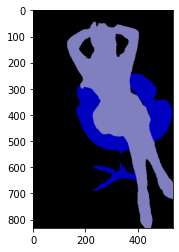

In [4]:
person_segvalues, person_output = model.segmentAsPascalvoc(person_img_path)

plt.imshow(person_output)
plt.show()

In [5]:
for class_id in person_segvalues['class_ids']: # 어떤 물체가 담겨 있는지 클래스(라벨) 정보들이 있음
    print(LABEL_NAMES[class_id])

background
chair
person


In [6]:
# person에 대한 color값만 가진 seg_color 변수 
person_seg_color = (128,128,192)

### 2. 이미지 처리

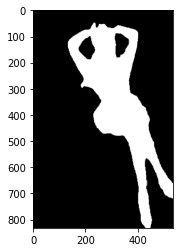

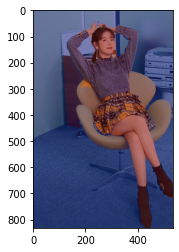

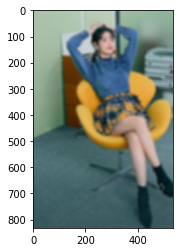

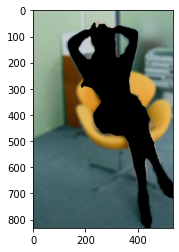

In [7]:
# 1. segmentation 물체 1,0으로 보여주기
person_seg_map = np.all(person_output==person_seg_color, axis=-1)
plt.imshow(person_seg_map, cmap='gray')
plt.show()

# 2. True과 False인 값을 각각 255과 0으로 바꿔줍니다
person_seg_mask = person_seg_map.astype(np.uint8) * 255

# 3. 255와 0을 적당한 색상으로 바꿔봅니다
person_seg_color_mask = cv2.applyColorMap(person_seg_mask, cv2.COLORMAP_JET)

# 4. 원본 이미지와 마스트를 적당히 합쳐보기
person_img_show = person_img_orig.copy()
person_img_show = cv2.addWeighted(person_img_show, 0.6, person_seg_color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(person_img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 5. Image 블러링
person_img_orig_blur = cv2.blur(person_img_orig, (13,13))
plt.imshow(cv2.cvtColor(person_img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 6. 배경 추출
person_seg_mask_color = cv2.cvtColor(person_seg_mask, cv2.COLOR_GRAY2BGR)
person_seg_bg_mask = cv2.bitwise_not(person_seg_mask_color)
person_img_bg_blur = cv2.bitwise_and(person_img_orig_blur, person_seg_bg_mask)
plt.imshow(cv2.cvtColor(person_img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

### 3. 사람 이미지 + 배경 흐리게 완료

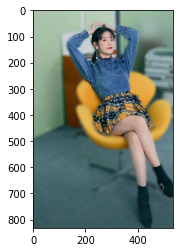

In [8]:
person_img_concat = np.where(person_seg_mask_color==255, person_img_orig, person_img_bg_blur)
plt.imshow(cv2.cvtColor(person_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

---

# 고양이 이미지 

(640, 480, 3)


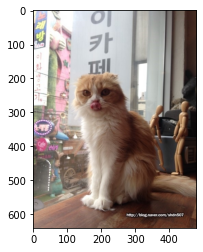

In [9]:
cat_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat2.jpeg'  
cat_img_orig = cv2.imread(cat_img_path)

print(cat_img_orig.shape)

plt.imshow(cv2.cvtColor(cat_img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### 1. 세그멘테이션

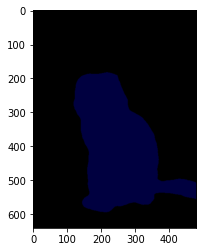

In [10]:
cat_segvalues, cat_output = model.segmentAsPascalvoc(cat_img_path)

plt.imshow(cat_output)
plt.show()

In [11]:
for class_id in cat_segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


In [12]:
cat_seg_color = (0, 0, 64)

### 2. 이미지 처리

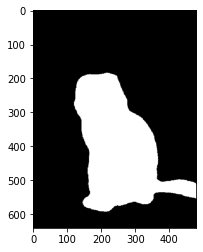

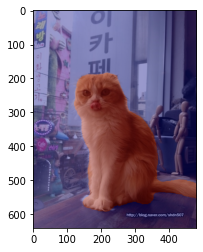

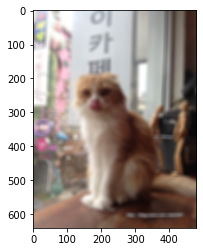

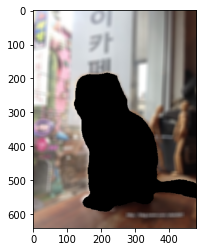

In [13]:
# 1. segmentation 물체 1,0으로 보여주기
cat_seg_map = np.all(cat_output==cat_seg_color, axis=-1)
plt.imshow(cat_seg_map, cmap='gray')
plt.show()

# 2. True과 False인 값을 각각 255과 0으로 바꿔줍니다
cat_seg_mask = cat_seg_map.astype(np.uint8) * 255

# 3. 255와 0을 적당한 색상으로 바꿔봅니다
cat_seg_color_mask = cv2.applyColorMap(cat_seg_mask, cv2.COLORMAP_JET)

# 4. 원본 이미지와 마스트를 적당히 합쳐보기
cat_img_show = cat_img_orig.copy()
cat_img_show = cv2.addWeighted(cat_img_show, 0.6, cat_seg_color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(cat_img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 5. Image 블러링
cat_img_orig_blur = cv2.blur(cat_img_orig, (13,13))
plt.imshow(cv2.cvtColor(cat_img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 6. 배경 추출
cat_seg_mask_color = cv2.cvtColor(cat_seg_mask, cv2.COLOR_GRAY2BGR)
cat_seg_bg_mask = cv2.bitwise_not(cat_seg_mask_color)
cat_img_bg_blur = cv2.bitwise_and(cat_img_orig_blur, cat_seg_bg_mask)
plt.imshow(cv2.cvtColor(cat_img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

### 3. 고양이 이미지 + 배경 흐리게 완료

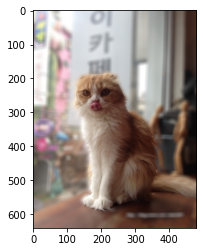

In [14]:
cat_img_concat = np.where(cat_seg_mask_color==255, cat_img_orig, cat_img_bg_blur)
plt.imshow(cv2.cvtColor(cat_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

---
# 이미지 크로마키 배경 합성

### 1. 배경 이미지 가져오기

(1038, 952, 3)


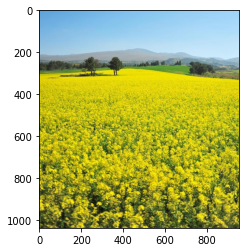

In [15]:
bg_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/background2.jpeg'  
bg_img_orig = cv2.imread(bg_img_path)

print(bg_img_orig.shape)

plt.imshow(cv2.cvtColor(bg_img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### 2. 고양이 추출

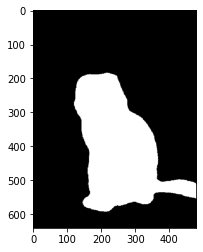

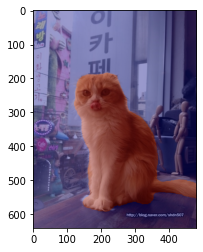

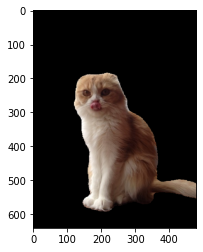

In [16]:
# 1. segmentation 물체 1,0으로 보여주기 : 고양이 찾기
cat_seg_map = np.all(cat_output==cat_seg_color, axis=-1)
plt.imshow(cat_seg_map, cmap='gray')
plt.show()

# 2. True과 False인 값을 각각 255과 0으로 바꿔줍니다
cat_seg_mask = cat_seg_map.astype(np.uint8) * 255

# 3. 255와 0을 적당한 색상으로 바꿔봅니다
cat_seg_color_mask = cv2.applyColorMap(cat_seg_mask, cv2.COLORMAP_JET)

# 4. 원본 이미지와 마스트를 적당히 합쳐보기
cat_img_show = cat_img_orig.copy()
cat_img_show = cv2.addWeighted(cat_img_show, 0.6, cat_seg_color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(cat_img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 5. 배경 추출
cat_seg_mask_color = cv2.cvtColor(cat_seg_mask, cv2.COLOR_GRAY2BGR)
cat_img_only = cv2.bitwise_and(cat_img_orig, cat_seg_mask_color)
plt.imshow(cv2.cvtColor(cat_img_only, cv2.COLOR_BGR2RGB))
plt.show()

### 3. 배경 이미지 사이즈 맞추기 & 블러링

In [17]:
cat_img_only.shape

(640, 480, 3)

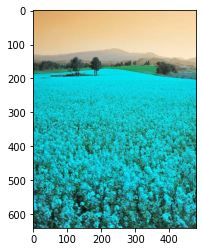

In [18]:
resized_bg_img = cv2.resize(bg_img_orig, (480,640))
plt.imshow(resized_bg_img)
plt.show()

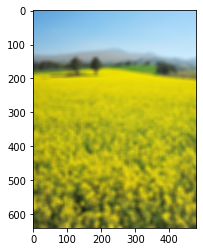

In [19]:
resized_bg_img_blur = cv2.blur(resized_bg_img, (13,13))
plt.imshow(cv2.cvtColor(resized_bg_img_blur, cv2.COLOR_BGR2RGB))
plt.show()

### 4. 이미지 합성

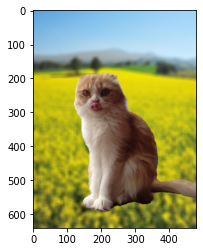

In [20]:
another_img_concat = np.where(cat_seg_mask_color==0, resized_bg_img_blur, cat_img_only)
plt.imshow(cv2.cvtColor(another_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

---

# Step2. 사진에서 문제점 찾기

인물 이미지처리할 때 몇가지 부분에서 문제점을 발견할 수 있었습니다. 

아래와 같이 

1. **배경인데 인물로 인식한 부분**
2. **인물의 치맛자락을 배경으로 인식한 부분**

두가지 부분에서 잘못 마스킹처리가 됐고,

<img src='result1.png'/>

실제 합성한 결과를 확인했을 때에도 

1. 배경인데 인물로 인식한 부분 -> ***블러처리가 안됨***
2. 인물의 치맛자락을 배경으로 인식한 부분 -> ***인물인데 블러처리 됨***

해당 부분들이 잘못 처리됨을 확인할 수 있었습니다. 

<img src='result2.png'/>

---

# Step3. 해결 방법을 제안해 보기

배경을 인물로 잘못 인식하거나, 인물의 일부를 배경으로 잘못 인식하는 문제점들이 있었는데요. 

저는 이 원인을 "피사계 심도가 구별이 잘 안되서 발생한 문제점" 이라 판단했습니다.

### 데이터 측면에서의 보완

```
피사계 심도란?
Focus하고자 하는 피사체를 기준으로 "초점이 맞은 범위"를 말하는데,
현재와 같이 아웃포커싱을 한 이미지는
"피사계 심도가 얕은 이미지" 입니다.
```

아웃포커싱에서 피사계 심도 개념이 중요한데요, 

카메라에서는 이 경우 조리개를 열어 렌즈가 빛을 더 많이 받게 해야 아웃포커싱이 잘된다고 합니다.

따라서 Step2 문제점을 데이터 측면에서 본다면,

애초에 이미지 원본데이터에서 피사체가 **밝고** **대비가 뚜렷하게** 나오도록 데이터 전처리를 하면 개선될 거라 생각합니다.

---

# 회고

### 1. 어려웠던 점 혹은 아직 모호한 점
- 이미지 처리나 문제점을 찾는건 어렵지 않았는데, 해결방법을 찾는것이 쉽지 않았습니다.
- Step3에서 새로운 아이디어와 매커니즘을 요구하는 점이 이해가 잘 되지 않습니다. Step3의 새로운 기법들은 이미지소스(Source)와 활용법들이 근본적으로 다른데, Step2의 문제점을 해결하라는지 모호합니다만.. 최대한 접목하려 노력했습니다.


### 2. 시도한 것들
- 피사계 심도와 조리개, 렌즈에 대해 더 이해하고자 리서치했습니다. 


### 3. 자기 다짐
```
갈수록 이미지 처리에 관심이 줄어듬을 느끼고 있습니다. (텍스트 처리가 더 재밌...)
앞으로 Exp 할 때 집중할 것에 좀 더 집중하고
이미지 처리 기법에는 넓고 다양하게 이해하는 정도로 (깊지 않게) 하는게 어떨까.. 고려하고 있습니다.
```